In [120]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import style
%matplotlib inline

In [121]:
style.use('fivethirtyeight')

In [122]:
df = pd.read_csv("../data/derived/complete_dataset.csv", parse_dates=['crash_time'])

In [123]:
df.shape

(98, 27)

In [124]:
df.columns

Index(['id', 'fault', 'motorist_name', 'motorist_sex', 'insured', 'veh_make',
       'veh_model', 'veh_year', 'cyclist_name', 'cyclist_sex', 'bike',
       'geo_loc', 'location_car', 'location_bike', 'arrest', 'officer_id',
       'm_citation', 'm_section', 'c_citation', 'c_section', 'hospital',
       'cyclist_cat', 'summary', 'data_source', 'crash_time', 'lat', 'long'],
      dtype='object')

In [125]:
df.shape

(98, 27)

In [126]:
df.cyclist_sex = df.cyclist_sex.apply(lambda x: x.lower())

In [127]:
df.cyclist_sex.value_counts()

m           81
f           14
unknown      2
redacted     1
Name: cyclist_sex, dtype: int64

In [128]:
# % male
81 / (81 + 14)

0.8526315789473684

In [129]:
# three foot rule?  11-703

In [130]:
df.m_section.value_counts()

11-904       5
11-906       3
11-903       3
11-601A      2
11-601(a)    2
11-1008      2
11-1002      2
11-703       1
11-403       1
11-1205      1
11-401       1
11-901       1
11-1003.1    1
11-1204B     1
11-709       1
11-901(c)    1
11-703(D)    1
11-902       1
5/6-303      1
Name: m_section, dtype: int64

## who gets the citation

In [131]:
motorist_ticket = df[(-df.m_section.isnull()) & (df.c_section.isnull())].shape[0] / df.shape[0]

In [132]:
# cyclist gets ticket
cyclist_ticket = df[(df.m_section.isnull()) & (-df.c_section.isnull())].shape[0] / df.shape[0]

In [133]:
# nobody gets ticket
no_ticket = df[(df.m_section.isnull()) & (df.c_section.isnull())].shape[0] / df.shape[0]

In [134]:
#both get ticket
both_ticket = df[(-df.m_section.isnull()) & (-df.c_section.isnull())].shape[0] / df.shape[0]

In [135]:
fault = pd.Series({"Cyclist": cyclist_ticket, "Motorist": motorist_ticket, "Neither": no_ticket, "Both":both_ticket})

In [136]:
fault = fault.sort_values(ascending=False)

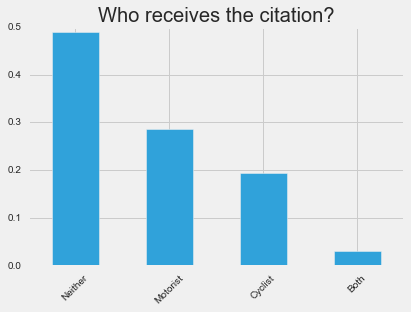

In [137]:
fault.plot(kind='bar', rot=45, title="Who receives the citation?")

In [138]:
fault

Neither     0.489796
Motorist    0.285714
Cyclist     0.193878
Both        0.030612
dtype: float64

## Citations in Bloomington Vs. Normal

In [139]:
blm_motorist_ticket = df[(-df.m_section.isnull()) & (df.c_section.isnull()) & (df.data_source == 'bloomington')].shape[0] 
blm_cyclist_ticket = df[(df.m_section.isnull()) & (-df.c_section.isnull()) & (df.data_source == 'bloomington')].shape[0] 
blm_no_ticket = df[(df.m_section.isnull()) & (df.c_section.isnull()) & (df.data_source == 'bloomington')].shape[0]
blm_both_ticket = df[(-df.m_section.isnull()) & (-df.c_section.isnull()) & (df.data_source == 'bloomington')].shape[0] 

In [140]:
norm_motorist_ticket = df[(-df.m_section.isnull()) & (df.c_section.isnull()) & (df.data_source == 'normal')].shape[0] 
norm_cyclist_ticket = df[(df.m_section.isnull()) & (-df.c_section.isnull()) & (df.data_source == 'normal')].shape[0] 
norm_no_ticket = df[(df.m_section.isnull()) & (df.c_section.isnull()) & (df.data_source == 'normal')].shape[0] 
norm_both_ticket = df[(-df.m_section.isnull()) & (-df.c_section.isnull()) & (df.data_source == 'normal')].shape[0] 

In [141]:
blm_count = df[df.data_source == 'bloomington'].shape[0]
norm_count = df[df.data_source == 'normal'].shape[0]

In [142]:
# percent motorists recieving citation in bloomington vs. normal
blm_mot_cit = blm_motorist_ticket / blm_count
norm_mot_cit = norm_motorist_ticket / norm_count
# percent cyclists recieving citation in bloomington vs. normal
blm_cyc_cit = blm_cyclist_ticket / blm_count
norm_cyc_cit = norm_cyclist_ticket / norm_count
# percent none in bloomington vs normal
blm_none_cit = blm_no_ticket / blm_count
norm_none_cit = norm_no_ticket / norm_count
# percent both in bloomington vs normal
blm_both_cit = blm_both_ticket / blm_count
norm_both_cit = norm_both_ticket / norm_count

In [143]:
citation_by_city = pd.Series({"Bloomington Motorists": blm_cyc_cit, "Normal Motorists": norm_mot_cit, 
           "Bloomington Cyclists":blm_cyc_cit, "Normal Cyclists": norm_cyc_cit, 
            "Bloomington Both": blm_both_cit, "Normal Both": norm_both_cit, 
            "Bloomington Neither": blm_none_cit, "Normal Neither": norm_none_cit})

In [144]:
citation_by_city

Bloomington Both         0.043478
Bloomington Cyclists     0.260870
Bloomington Motorists    0.260870
Bloomington Neither      0.586957
Normal Both              0.020408
Normal Cyclists          0.142857
Normal Motorists         0.408163
Normal Neither           0.428571
dtype: float64

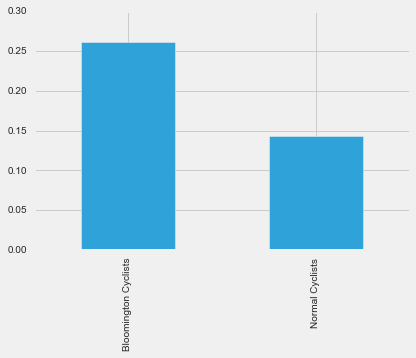

In [145]:
citation_by_city[['Bloomington Cyclists', 'Normal Cyclists']].plot(kind='bar')

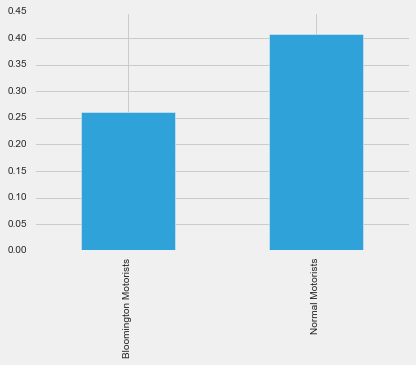

In [146]:
citation_by_city[['Bloomington Motorists', 'Normal Motorists']].plot(kind='bar')

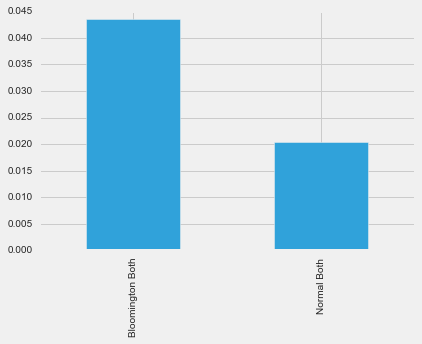

In [147]:
citation_by_city[['Bloomington Both', 'Normal Both']].plot(kind='bar')

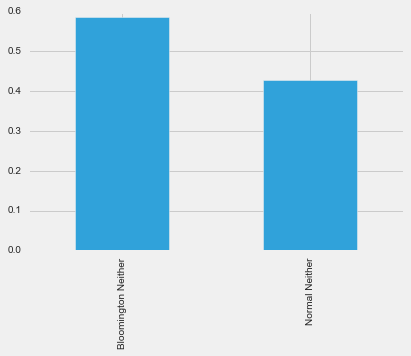

In [148]:
citation_by_city[['Bloomington Neither', 'Normal Neither']].plot(kind='bar')

In [160]:
df[df.data_source=='bloomington'].m_section.value_counts().count()

6

In [159]:
df[df.data_source=='normal'].m_section.value_counts().count()

13

In [ ]:
#6 different types in bloomington, 13 in normal

In [166]:
df[df.data_source=='bloomington'].m_section.value_counts()

11-904       2
11-901       1
11-401       1
11-709       1
5/6-303      1
11-703(D)    1
Name: m_section, dtype: int64

In [167]:
df[df.data_source=='normal'].m_section.value_counts()

11-906       3
11-903       3
11-904       3
11-1008      2
11-1002      2
11-1003.1    1
11-601(a)    1
11-902       1
11-1204B     1
11-901(c)    1
11-601A      1
11-1205      1
11-403       1
Name: m_section, dtype: int64

In [168]:
# which ticket types were written in normal, but were never written in bloomington, applied to motorists

set(df[df.data_source=='normal'].m_section.values) - set(df[df.data_source=='bloomington'].m_section.values)

{'11-1002',
 '11-1003.1',
 '11-1008',
 '11-1204B',
 '11-1205',
 '11-403',
 '11-601(a)',
 '11-601A',
 '11-901(c)',
 '11-902',
 '11-903',
 '11-906'}

In [ ]:
#  interesting   11-901(c) is the same as 901.  

In [161]:
df[df.data_source=='bloomington'].c_section.value_counts().count()

12

In [162]:
df[df.data_source=='normal'].c_section.value_counts().count()

7

In [163]:
# cyclists 12 different violations in bloomington, 7 in normal

In [165]:
# which ticket types were written in bloomington applied to cyclists, but were never written in normal

set(df[df.data_source=='bloomington'].c_section.values) - set(df[df.data_source=='normal'].c_section.values)

{'11-1002',
 '11-1204',
 '11-1205',
 '11-1505',
 '11-1512',
 '11-305',
 '11-401',
 '11-709',
 '29/16/A',
 '5/11-1001'}

# requires hospital

In [54]:
df.hospital.value_counts()

refused     49
bromenn     30
osf         12
na           2
unknown      2
hospital     1
no           1
n/a          1
Name: hospital, dtype: int64

In [63]:
hospital = pd.Series({"No": 53/98, "Yes": 43/98, "Unknown": 2/98})
hospital = hospital.sort_values(ascending=False)

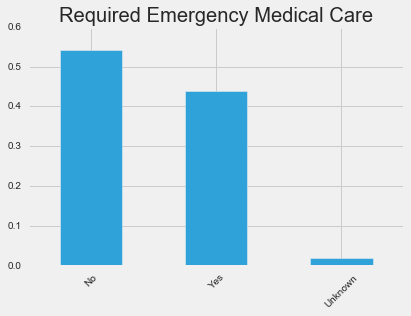

In [64]:
hospital.plot(kind='bar', rot=45, title="Required Emergency Medical Care")

In [37]:
blm_hosp = df[(df.data_source=='bloomington') & (df.hospital.isin(['bromenn', 'osf', 'hospital'])) ].shape[0] / \
        df[df.data_source == 'bloomington'].shape[0]
    
norm_hosp = df[(df.data_source=='normal') & (df.hospital.isin(['bromenn', 'osf', 'hospital'])) ].shape[0] / \
        df[df.data_source == 'normal'].shape[0]

In [38]:
blm_hosp

0.5217391304347826

In [39]:
norm_hosp

0.3469387755102041

In [50]:
df[(df.data_source=='bloomington') & (df.fault=='cyclist')].shape[0] / df[df.data_source=='bloomington'].shape[0]

0.5217391304347826

In [51]:
df[(df.data_source=='normal') & (df.fault=='cyclist')].shape[0] / df[df.data_source=='normal'].shape[0]

0.20408163265306123

In [42]:
df[df.data_source=='normal'].fault.value_counts()

motorist    26
cyclist     10
unknown      9
both         3
none         1
Name: fault, dtype: int64